In [1]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.model_selection import (
    train_test_split,
    LearningCurveDisplay,
    learning_curve,
)
from sklearn.neural_network import MLPRegressor

seed = 23

In [2]:
def learning_curve_display(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y)

    display = LearningCurveDisplay(
        train_sizes=train_sizes,
        train_scores=train_scores,
        test_scores=test_scores,
        score_name="Score",
    )

    display.plot()

# EDA

In [3]:
sns.set_theme(style="darkgrid")

In [4]:
paths = glob.glob("data/*.csv")
paths

['data/insurance.csv']

In [5]:
data_path = paths[-1]
data_path

'data/insurance.csv'

Explore dataset

In [6]:
df = pd.read_csv(data_path)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Plots

Numeric

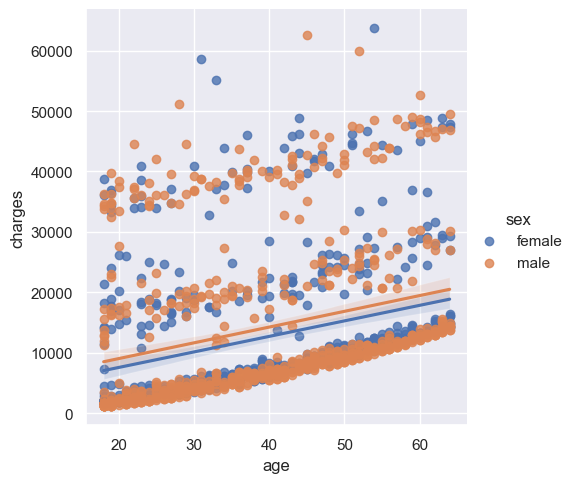

In [9]:
sns.lmplot(df, x="age", y="charges", hue="sex")

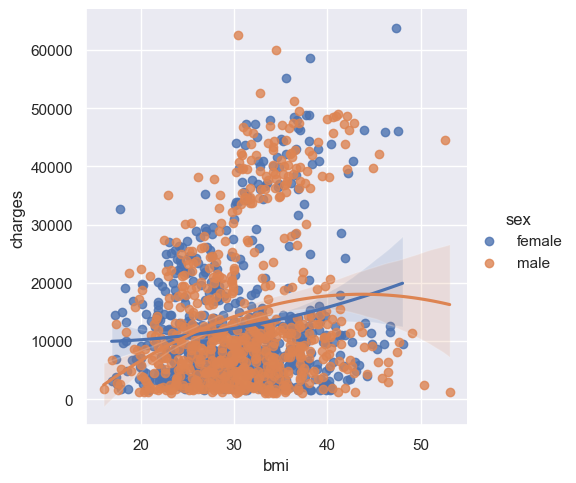

In [10]:
sns.lmplot(df, x="bmi", y="charges", hue="sex", order=2)

In [11]:
numeric_df = df[["age", "bmi", "children"]]
numeric_df

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


<Axes: >

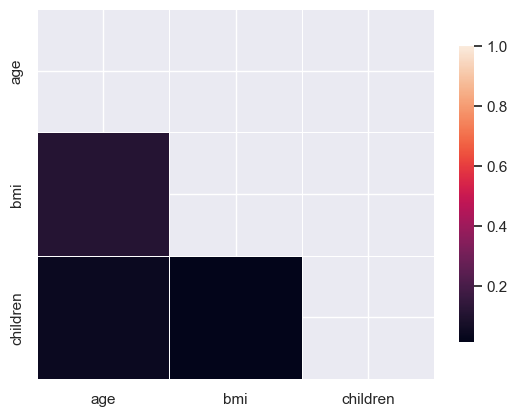

In [12]:
corr = numeric_df.corr()
sns.heatmap(
    corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)

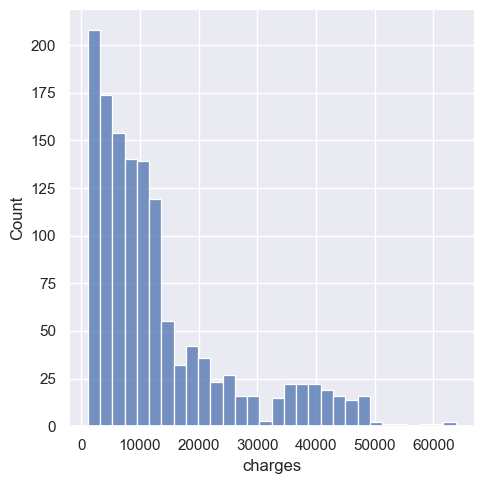

In [13]:
sns.displot(df, x="charges")

Charges normalization

In [14]:
norm_charges = df[["charges"]].apply(
    lambda x: ((x - df["charges"].min()) / (df["charges"].max() - df["charges"].min()))
)
norm_charges

,charges
0,0.251611
1,0.009636
2,0.053115
3,0.333010
4,0.043816
...,...
1333,0.151299
1334,0.017305
1335,0.008108
1336,0.014144


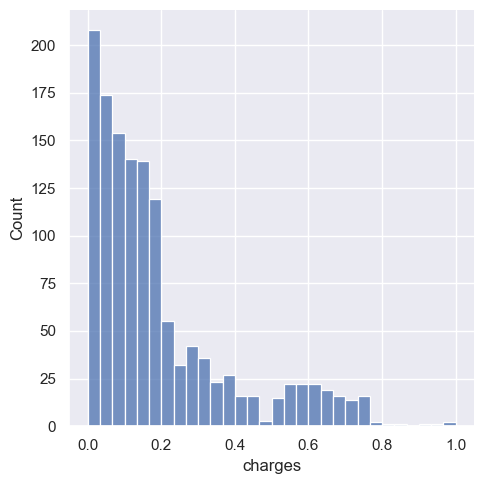

In [15]:
sns.displot(
    norm_charges,
    x="charges",
)

Charges standardization

In [16]:
std_charges = df[["charges"]].apply(
    lambda x: ((x - df["charges"].mean()) / df["charges"].std())
)
std_charges

,charges
0,0.298472
1,-0.953333
2,-0.728402
3,0.719574
4,-0.776512
...,...
1333,-0.220468
1334,-0.913661
1335,-0.961237
1336,-0.930014


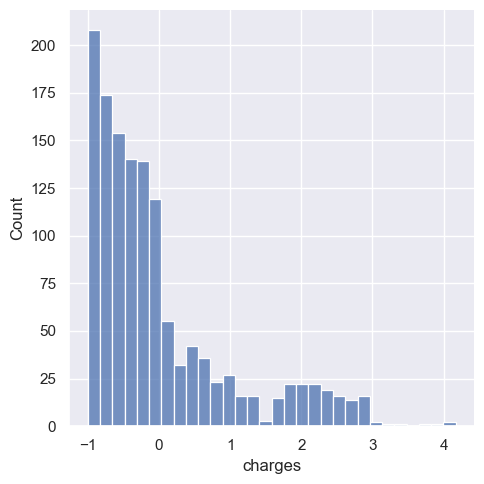

In [17]:
sns.displot(
    std_charges,
    x="charges",
)

Charges log transform

In [18]:
log10_charges = df[["charges"]].apply(lambda x: np.log10(x))
log10_charges

,charges
0,4.227499
1,3.236928
2,3.648308
3,4.342116
4,3.587358
...,...
1333,4.025328
1334,3.343602
1335,3.212143
1336,3.302752


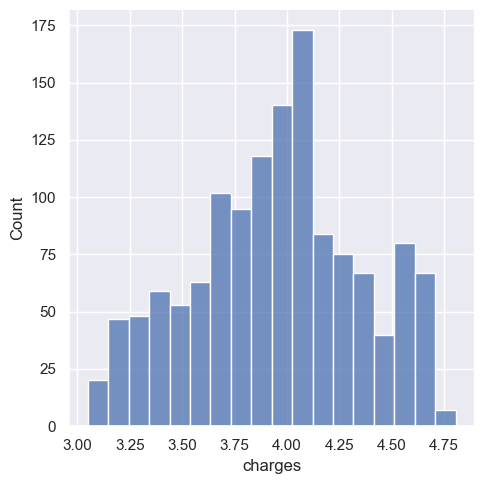

In [19]:
sns.displot(
    log10_charges,
    x="charges",
)

In [20]:
logn_charges = df[["charges"]].apply(lambda x: np.log(x))
logn_charges

,charges
0,9.734176
1,7.453302
2,8.400538
3,9.998092
4,8.260197
...,...
1333,9.268661
1334,7.698927
1335,7.396233
1336,7.604867


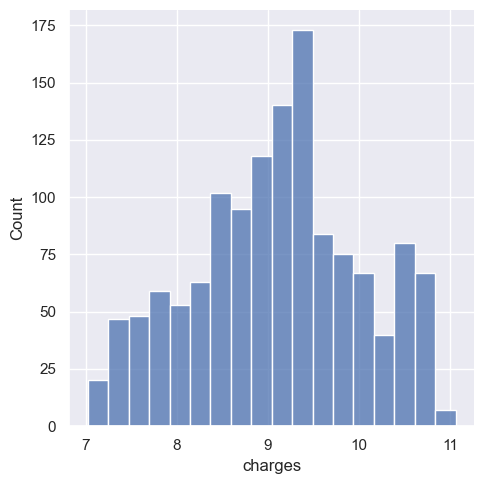

In [21]:
sns.displot(
    logn_charges,
    x="charges",
)

BMI Distribution

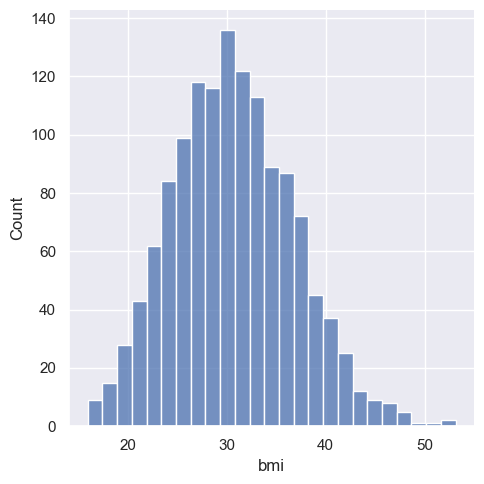

In [22]:
sns.displot(df, x="bmi")

Age distribution

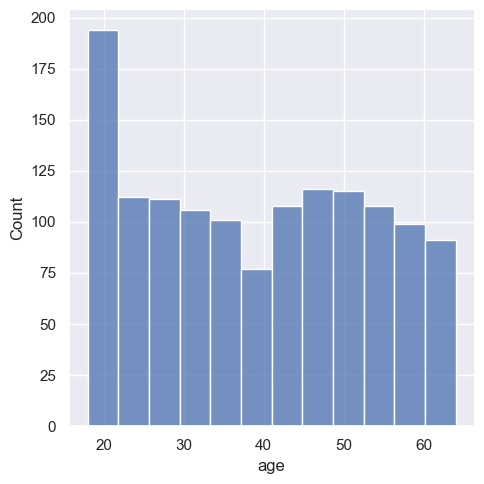

In [23]:
sns.displot(df, x="age")

Preprocess dataframe

In [24]:
df["charges_log10"] = log10_charges
df["charges_logn"] = logn_charges

In [25]:
df_clean = pd.get_dummies(df, sparse=False, drop_first=True, dtype=float)

df_clean

,age,bmi,children,charges,charges_log10,charges_logn,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,4.227499,9.734176,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,3.236928,7.453302,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,3.648308,8.400538,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,4.342116,9.998092,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,3.587358,8.260197,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,4.025328,9.268661,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,3.343602,7.698927,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,3.212143,7.396233,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,3.302752,7.604867,0.0,0.0,0.0,0.0,1.0


In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   charges_log10     1338 non-null   float64
 5   charges_logn      1338 non-null   float64
 6   sex_male          1338 non-null   float64
 7   smoker_yes        1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_southeast  1338 non-null   float64
 10  region_southwest  1338 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 115.1 KB


# Machine Learning

## Split dataset

In [27]:
X = df_clean.drop(columns=["charges", "charges_log10", "charges_logn"])
y_charges = df_clean[["charges"]]
y_chargeslog10 = df_clean[["charges_log10"]]

print(X.shape, y_charges.shape, y_chargeslog10.shape)

(1338, 8) (1338, 1) (1338, 1)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_charges, test_size=0.2, random_state=seed, shuffle=True
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 8) (268, 8) (1070, 1) (268, 1)


In [29]:
X_train_log, X_test_log, y_trainlog, y_test_log = train_test_split(
    X, y_chargeslog10, test_size=0.2, random_state=seed, shuffle=True
)

print(X_train_log.shape, X_test_log.shape, y_trainlog.shape, y_test_log.shape)

(1070, 8) (268, 8) (1070, 1) (268, 1)


## MLflow

In [30]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [31]:
mlflow.set_experiment("medical-insurance-regression")

2025/09/20 12:53:08 INFO mlflow.tracking.fluent: Experiment with name 'medical-insurance-regression' does not exist. Creating a new experiment.


<Experiment: artifact_location='/Users/omar/Desktop/Professional/Work/insurance/mlruns/221207765889808369', creation_time=1758361988416, experiment_id='221207765889808369', last_update_time=1758361988416, lifecycle_stage='active', name='medical-insurance-regression', tags={}>

In [32]:
mlflow.sklearn.autolog(log_models=True)

## Linear Regression

In [33]:
lr_model = LinearRegression()

lr_hist = lr_model.fit(X_train, y_train)
lr_hist.score(X_test, y_test)  # R2

2025/09/20 12:53:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1d93f2128787408ca0cbdb566632352b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run tasteful-wren-198 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/1d93f2128787408ca0cbdb566632352b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


0.7536440382001555

In [34]:
lr_model = LinearRegression()

lr_hist = lr_model.fit(X_train_log, y_trainlog)
lr_hist.score(X_test_log, y_test_log)  # R2

2025/09/20 12:53:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5ec69261e98b4566ba2981c6faa474fd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

2025/09/20 12:53:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


🏃 View run adorable-slug-874 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/5ec69261e98b4566ba2981c6faa474fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


0.7996323002117186

2025/09/20 12:53:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6e7d0a5c523540908f2ddc9227626f7e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

2025/09/20 12:53:35 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd27ace243b724edd8082c06547907496', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run gifted-elk-942 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/6e7d0a5c523540908f2ddc9227626f7e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '91690a883dde405d923ac160d34ade50', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run abrasive-dolphin-908 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/d27ace243b724edd8082c06547907496
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'df4a666a06b54450b9d84343fd465bf1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run puzzled-sponge-564 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/91690a883dde405d923ac160d34ade50
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e638535515e5447395766326dfa09c1d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run peaceful-foal-534 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/df4a666a06b54450b9d84343fd465bf1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4116633115f94b23b3f9ce5c8ad3c2a2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run gregarious-mole-935 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/e638535515e5447395766326dfa09c1d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '16536a0abd1647428888e2ebd3eef70c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run luxuriant-quail-691 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/4116633115f94b23b3f9ce5c8ad3c2a2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3245ecbd6b0a4789935f77cc346b8a14', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run whimsical-dove-590 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/16536a0abd1647428888e2ebd3eef70c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c4cce425f30142f7913921fe128d5791', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run spiffy-stoat-407 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/3245ecbd6b0a4789935f77cc346b8a14
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:46 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4a7b99c67a36416d97eb62287086f087', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run exultant-shark-846 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/c4cce425f30142f7913921fe128d5791
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7f424d645033489b9f74b3fb62bbd08d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run abrasive-moose-807 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/4a7b99c67a36416d97eb62287086f087
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a2c00a0592fa4298b310a57ca6f5515f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:49 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run gaudy-shoat-618 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/7f424d645033489b9f74b3fb62bbd08d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '41c5260981a54ae6951127d9b554c860', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run victorious-robin-882 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/a2c00a0592fa4298b310a57ca6f5515f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e867f372477d425381dd0afa124ec36b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run wise-finch-222 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/41c5260981a54ae6951127d9b554c860
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '68b7ac68cbf040769a3bfd10a649d15d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run mercurial-swan-966 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/e867f372477d425381dd0afa124ec36b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7ac64e0fcb2a4f79a6c23b28bd6c5fd6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run orderly-shark-982 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/68b7ac68cbf040769a3bfd10a649d15d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:56 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8c5357bef2ac4721ba2b1d53c69cc25d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:56 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run rogue-owl-88 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/7ac64e0fcb2a4f79a6c23b28bd6c5fd6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7bbd46d71002437c8861e4d10899a4b9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run useful-midge-988 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/8c5357bef2ac4721ba2b1d53c69cc25d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:53:59 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e65fa63e193547d1a6756068cb4be56d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:53:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run capricious-goat-616 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/7bbd46d71002437c8861e4d10899a4b9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:01 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3cbe8b8977354e7e9c7e6c9cd50f1586', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run tasteful-midge-428 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/e65fa63e193547d1a6756068cb4be56d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c6fab8a87d964c1c93a6a7b0bfdc8657', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run exultant-mouse-237 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/3cbe8b8977354e7e9c7e6c9cd50f1586
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2885f9a16c0844ab9dcb9fbc0a87bc5e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run bald-hound-479 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/c6fab8a87d964c1c93a6a7b0bfdc8657
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7748f9e34afd43c0a957ab3437043755', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run redolent-lynx-972 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/2885f9a16c0844ab9dcb9fbc0a87bc5e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9aadebc89f174f279cbda4fb65e9ec3b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run gentle-wasp-757 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/7748f9e34afd43c0a957ab3437043755
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b33c9a0ff95c4ea89faefd923e511af0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run abrasive-crab-605 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/9aadebc89f174f279cbda4fb65e9ec3b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369
🏃 View run fun-elk-71 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/b33c9a0ff95c4ea89faefd923e511af0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


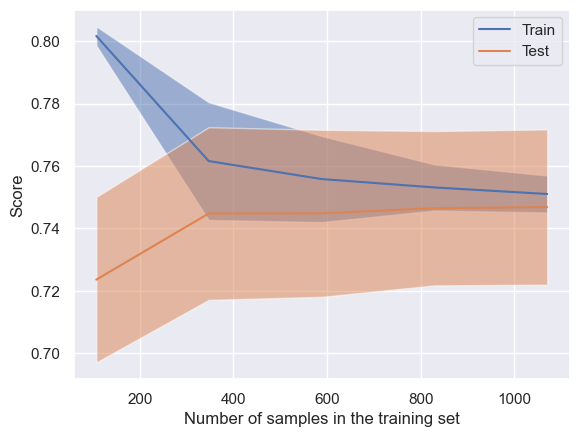

In [35]:
learning_curve_display(lr_hist, X, y_charges)

2025/09/20 12:54:09 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4181051558e5447a9aef46b42c43e194', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run defiant-sow-644 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/4181051558e5447a9aef46b42c43e194
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '20f68c58dc0d488986d99818cdbcb621', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run sassy-ant-813 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/ff440d837be24126bc4dce1f01213d1b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fba68a0328b845ea93243860933d415b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:14 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run efficient-cub-52 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/20f68c58dc0d488986d99818cdbcb621
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5b86448e79024558b0a5e7b3349b77e8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:15 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run nebulous-smelt-560 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/fba68a0328b845ea93243860933d415b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '223b3438dd5a490183612553402fd38d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run rumbling-gnu-329 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/5b86448e79024558b0a5e7b3349b77e8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8ec9309941ed4cef922d9b5ab01f68d6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run treasured-stork-551 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/223b3438dd5a490183612553402fd38d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:19 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c342e46519764747a26dfe534835c7c3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run salty-sheep-147 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/8ec9309941ed4cef922d9b5ab01f68d6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b0183023280b417ca4c16dea7abdf721', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run serious-bass-360 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/c342e46519764747a26dfe534835c7c3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '198a4c54517549889ae397f46cda5d9b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run nimble-swan-735 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/b0183023280b417ca4c16dea7abdf721
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:24 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fccc59f3150f4b168badc2dba5c2d069', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run fortunate-midge-715 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/198a4c54517549889ae397f46cda5d9b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'aeddb7b4f9c84ec5985735e558308730', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run adaptable-colt-521 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/fccc59f3150f4b168badc2dba5c2d069
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '78795b8da85b4ff58051e89e52d65fc0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run debonair-croc-971 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/aeddb7b4f9c84ec5985735e558308730
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c13a70fc88d44df8a22e9917c85ed6f3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:28 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run angry-grouse-999 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/78795b8da85b4ff58051e89e52d65fc0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1f5c18dc8b7c48e9be49546370104873', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run auspicious-sow-497 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/c13a70fc88d44df8a22e9917c85ed6f3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '09273773023f4c86a44a8a74a39a7925', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:31 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run sassy-bear-644 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/1f5c18dc8b7c48e9be49546370104873
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0b16f2982cc145d7be1819a96b41fe5d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run enchanting-pig-654 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/09273773023f4c86a44a8a74a39a7925
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '62cf8df1d565460ca6b8908ddb294d8a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run crawling-wren-804 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/0b16f2982cc145d7be1819a96b41fe5d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4b0c11bddb1f434fa94fab75389b7267', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run big-penguin-351 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/62cf8df1d565460ca6b8908ddb294d8a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1da746d6888b47dda285bafdb674f1c8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run defiant-shoat-482 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/4b0c11bddb1f434fa94fab75389b7267
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7dc8e406b0fd4a3a8cbcc10b17ebb729', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run vaunted-duck-989 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/1da746d6888b47dda285bafdb674f1c8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e8b9194a88654cf2ba5a6da3cfc66501', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run marvelous-skink-462 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/7dc8e406b0fd4a3a8cbcc10b17ebb729
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'cd16eb63a73347a889f5479927d8c7d8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run grandiose-pig-522 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/e8b9194a88654cf2ba5a6da3cfc66501
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f88140e40efc437c901d5ae10630e9c2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run suave-shrike-625 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/cd16eb63a73347a889f5479927d8c7d8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


2025/09/20 12:54:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4b5c0d5c3edf42e39ab32a2f1ce860e5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/09/20 12:54:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers W

🏃 View run caring-fish-599 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/f88140e40efc437c901d5ae10630e9c2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369
🏃 View run amazing-bass-751 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/4b5c0d5c3edf42e39ab32a2f1ce860e5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369


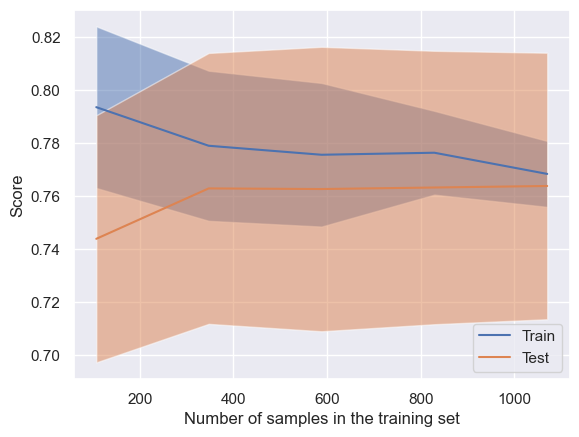

In [36]:
learning_curve_display(lr_hist, X, y_chargeslog10)

## Support Vector Machine algorithms

- LinearSVR: linear support vector regression
- NuSVR: nu-support vector regression
- SVR: epsilon-support vector regression

In [ ]:
# The main differences between LinearSVR and SVR lie in the loss function used by default,
# and in the handling of intercept regularization between those two implementations.

In [78]:
lsvr_model = LinearSVR(
    epsilon=0,  # Epsilon insensitive loss function, depends on the scale of y
    tol=1e-4,  # Tolerance for stopping criteria
    C=1.0,  # Regularization parameter, x > 0
    loss="epsilon_insensitive",  # {epsilon_insensitive, squared_epsilon_insensitive}
    fit_intercept=True,
    # intercept_scaling,
    # dual,
    verbose=1,
    random_state=seed,
    max_iter=10,
)

lsvr_hist = lsvr_model.fit(X_train, y_train)
lsvr_hist.score(X_test, y_test)

[LibLinear].
optimization finished, #iter = 10

Using -s 11 may be faster

Objective value = -7327845.388160
nSV = 1070


/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-0.051424389815026395

In [79]:
lsvr_model = LinearSVR(
    epsilon=0,  # Epsilon insensitive loss function, depends on the scale of y
    tol=1e-4,  # Tolerance for stopping criteria
    C=1.0,  # Regularization parameter, x > 0
    loss="epsilon_insensitive",  # {epsilon_insensitive, squared_epsilon_insensitive}
    fit_intercept=True,
    # intercept_scaling,
    # dual,
    verbose=1,
    random_state=seed,
    max_iter=10,
)

lsvr_hist = lsvr_model.fit(X_train, y_trainlog)
lsvr_hist.score(X_test, y_test_log)

[LibLinear].
optimization finished, #iter = 10

Using -s 11 may be faster

Objective value = -0.092520
nSV = 1070


/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9991076242793229

In [81]:
nsvr = NuSVR(verbose=True)
nsvr_hist = nsvr.fit(X_train, y_train)
nsvr.score(X_test, y_test)

[LibSVM]*
optimization finished, #iter = 620
epsilon = 6216.283288
obj = -7599583.793987, rho = -11172.092029
nSV = 536, nBSV = 534


/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.009703164202401693

In [82]:
nsvr = NuSVR(verbose=True)
nsvr_hist = nsvr.fit(X_train, y_trainlog)
nsvr.score(X_test, y_test_log)

[LibSVM].
.
*
optimization finished, #iter = 2764
epsilon = 0.005369
obj = -105.737415, rho = -3.841387
nSV = 562, nBSV = 509


/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9855637615880748

## Decision Tree Regressors

In [71]:
criterions = ["squared_error", "friedman_mse", "absolute_error", "poisson"]

In [72]:
for crt in criterions:
    dt_model = DecisionTreeRegressor(criterion=crt, splitter="best", random_state=seed)

    dt_hist = dt_model.fit(X_train, y_train)
    print(dt_hist)

    score = dt_hist.score(X_test, y_test)
    print(f"Score: {score}.")

DecisionTreeRegressor(random_state=23)
Score: 0.6738662962654722.
DecisionTreeRegressor(criterion='friedman_mse', random_state=23)
Score: 0.6857007856735147.
DecisionTreeRegressor(criterion='absolute_error', random_state=23)
Score: 0.7175422983433035.
DecisionTreeRegressor(criterion='poisson', random_state=23)
Score: 0.7045361585197863.


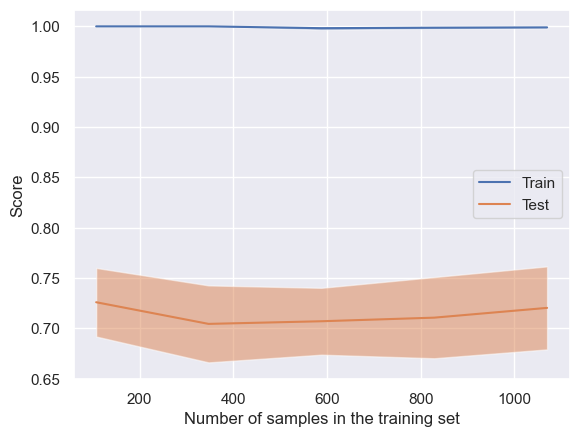

In [77]:
learning_curve_display(dt_model, X, y)

## Neural Network

In [37]:
models = {
    "neural_networks": {
        "model_type": MLPRegressor,
        "params": [
            dict(
                loss="squared_error",
                hidden_layer_sizes=(5000, 200),
                activation="relu",
                solver="adam",
                learning_rate="adaptive",
                learning_rate_init=1e-3,
                batch_size=128,
                max_iter=200000,
                random_state=seed,
                early_stopping=True,
                verbose=True,
            ),
            dict(
                loss="squared_error",
                hidden_layer_sizes=(5000, 200),
                activation="relu",
                solver="adam",
                learning_rate="adaptive",
                learning_rate_init=1e-2,
                batch_size=8,
                max_iter=200000,
                random_state=seed,
                early_stopping=True,
                verbose=True,
            ),
            dict(
                loss="squared_error",
                hidden_layer_sizes=(5000, 200),
                activation="relu",
                solver="adam",
                learning_rate="adaptive",
                learning_rate_init=1e-2,
                batch_size=32,
                max_iter=200000,
                random_state=seed,
                early_stopping=True,
                verbose=True,
            ),
        ],
    },
}

from sklearn.metrics import mean_absolute_error, r2_score

for m in models:
    params = models[m]["params"]
    m_type = models[m]["model_type"]

    for i, p in enumerate(params):
        model = m_type(**p)

        run_name = f"{m}_{i}"
        with mlflow.start_run(run_name=run_name):
            model = model.fit(X_train, y_trainlog)
            # print(model.score(X_test, y_test_log))

            y_pred = model.predict(X_test)

            mae = mean_absolute_error(y_test_log, y_pred)
            r2 = r2_score(y_test_log, y_pred)

            print(f"MAE: {mae}")
            print(f"R2: {r2}")
            mlflow.log_metric("mae", mae)
            mlflow.log_metric("r2", r2)

2025/09/20 12:54:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1771: DataConversi

Iteration 1, loss = 20.44715617
Validation score: -16.499477
Iteration 2, loss = 1.11474757
Validation score: -22.279265
Iteration 3, loss = 0.50001721
Validation score: -7.776730
Iteration 4, loss = 0.38819618
Validation score: -5.861857
Iteration 5, loss = 0.25288111
Validation score: -3.056773
Iteration 6, loss = 0.22318770
Validation score: -2.998868
Iteration 7, loss = 0.21201407
Validation score: -2.870634
Iteration 8, loss = 0.20637764
Validation score: -2.758856
Iteration 9, loss = 0.20071210
Validation score: -2.932271
Iteration 10, loss = 0.19372648
Validation score: -2.465154
Iteration 11, loss = 0.19809976
Validation score: -2.694650
Iteration 12, loss = 0.17893923
Validation score: -2.187819
Iteration 13, loss = 0.17407258
Validation score: -2.049085
Iteration 14, loss = 0.16615101
Validation score: -1.951120
Iteration 15, loss = 0.15387429
Validation score: -1.733054
Iteration 16, loss = 0.14667461
Validation score: -1.640692
Iteration 17, loss = 0.14794822
Validation sco

2025/09/20 12:54:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Iteration 83, loss = 0.01665602
Validation score: 0.674291
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


2025/09/20 12:54:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/09/20 12:54:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/ins

MAE: 0.11818946726314539
R2: 0.8345442333447192
🏃 View run neural_networks_0 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/19a2e375c4f24170a2c912a9b731fa13
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369
Iteration 1, loss = 136.10828059
Validation score: -1.464631
Iteration 2, loss = 0.16716935
Validation score: -1.606786
Iteration 3, loss = 0.13012317
Validation score: -1.709418
Iteration 4, loss = 0.09750021
Validation score: -2.395635
Iteration 5, loss = 0.07067930
Validation score: 0.353569
Iteration 6, loss = 0.05514901
Validation score: -0.545733
Iteration 7, loss = 0.04241109
Validation score: -0.568667
Iteration 8, loss = 0.05760312
Validation score: 0.115069
Iteration 9, loss = 0.04239133
Validation score: 0.519782
Iteration 10, loss = 0.04295344
Validation score: 0.027191
Iteration 11, loss = 0.04434522
Validation score: 0.587827
Iteration 12, loss = 0.03300549
Validation score: 0.386732
Iteration 13, loss = 0.03715745
Validation

2025/09/20 12:55:31 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Iteration 29, loss = 0.02655375
Validation score: 0.166907
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


2025/09/20 12:55:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/09/20 12:55:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/ins

MAE: 0.11113608462228695
R2: 0.8074683150557005
🏃 View run neural_networks_1 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/68975c6c5f9c42a5ba5d2c0b183a8d2b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369
Iteration 1, loss = 497.04720128
Validation score: -4.942005
Iteration 2, loss = 0.17547267
Validation score: -1.397950
Iteration 3, loss = 0.16472576
Validation score: -3.482694
Iteration 4, loss = 0.12842710
Validation score: -6.391961
Iteration 5, loss = 0.16927078
Validation score: -0.718522
Iteration 6, loss = 0.09369436
Validation score: -0.362945
Iteration 7, loss = 0.06548005
Validation score: -3.630350
Iteration 8, loss = 0.07194300
Validation score: 0.206808
Iteration 9, loss = 0.04617624
Validation score: -3.121913
Iteration 10, loss = 0.06012008
Validation score: 0.489067
Iteration 11, loss = 0.02912828
Validation score: 0.436908
Iteration 12, loss = 0.03537014
Validation score: -0.239074
Iteration 13, loss = 0.05470853
Validat

2025/09/20 12:55:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Iteration 29, loss = 0.06565358
Validation score: -0.067347
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


2025/09/20 12:55:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/omar/.pyenv/versions/insurance/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


MAE: 0.0895274336379081
R2: 0.8522993080756421
🏃 View run neural_networks_2 at: http://127.0.0.1:5000/#/experiments/221207765889808369/runs/e56038d215e54b218f29a2a3ab63e4a2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/221207765889808369
